###**Project 2 - Part 2 (Core)**

<h3> Thandolwethu Siloyi

###**Desciption**

<h6>This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality.

<h6>The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description.

###**Data Set Information**

<h6>winery: Winery name
<h6>wine: Name of the wine
<h6>year: Year in which the grapes were harvested
<h6>rating: Average rating given to the wine by the users [from 1-5]
<h6>num_reviews: Number of users that reviewed the wine
<h6>country: Country of origin [Spain]
<h6>region: Region of the wine
<h6>price: Price in euros [€]
<h6>type: Wine variety
<h6>body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]
<h6>acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

###**Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandas
import pandas as pd
# numpy
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns



###**1. Load and Inspect the data**

In [ ]:
# loading the data
new_url = '/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/02-MachineLearning/Week08/Data/wines_SPA.csv'
df_wine = pd.read_csv(new_url)

In [ ]:
# display the first 5 rows
df_wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# displaying the number of rows and columns for the dataframe
df_wine.shape
print(f'There are {df_wine.shape[0]} rows, and {df_wine.shape[1]} columns')
print(f'The rows represent {df_wine.shape[0]} observations, and the columns represent {df_wine.shape[1]-1} features and 1 target variable')

There are 7500 rows, and 11 columns
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable


In [ ]:
# display the column names, count of non-null values, and their datatypes
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


###**2. Clean the Data**

###**Remove Unecessary Columns**


*   There are no columns to be dropped




###**Remove Unecessary Rows***

###**Duplicates**

In [ ]:
# display the number of duplicated rows in the dataset
print(f'There are {df_wine.duplicated().sum()} duplicate rows.')

There are 5452 duplicate rows.


In [ ]:
# drop duplicated rows
df_wine.drop_duplicates(inplace=True)

In [ ]:
# display the number of duplicated rows in the dataset RE-CHECKING
print(f'There are {df_wine.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


###**Missing values**

In [ ]:
# display the total number of missing values for each feature
df_wine.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [ ]:
# display the total number of missing values in the dataset
print(f'There are {df_wine.isna().sum().sum()} missing values')

There are 650 missing values


In [ ]:
# checking for data types for each column
df_wine.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

###**Inpect Values for errors**


*   Checking for impossible or unusual values



In [ ]:
# checking for impossible values in numeric
df_wine.describe(include='number')

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000



*   We could not find impossible values = 0



In [ ]:
# checking for impossible values in object
df_wine.describe(include='object')

,winery,wine,year,country,region,type
count,2048,2048,2046,2048,2048,1942
unique,480,847,71,1,76,21
top,Vega Sicilia,Tinto,2016,Espana,Ribera del Duero,Ribera Del Duero Red
freq,97,56,243,2048,541,535


## **Find and Fix Inconsistancies for Categorical Values**

In [ ]:
# show categorical columns
string_col = df_wine.select_dtypes('object').columns
string_col

Index(['winery', 'wine', 'year', 'country', 'region', 'type'], dtype='object')



*   year column should be in numerical columns



In [ ]:
df_wine['year'].value_counts()

2016    243
2017    240
2015    206
2018    196
2014    158
       ... 
1953      1
1972      1
1974      1
1931      1
1925      1
Name: year, Length: 71, dtype: int64

In [ ]:
# convert column year to float
col_year = df_wine['year']
col_year

0       2013
1       2018
2       2009
3       1999
4       1996
        ... 
2046    2017
2047    2011
2048    2016
2049    2005
6100    2017
Name: year, Length: 2048, dtype: object

In [ ]:
# convert string values to NaN and ensure numerical datatype
df_wine['year'] = pd.to_numeric(df_wine['year'], errors='coerce')


In [ ]:
# checking inconsistancies
for column in string_col:
  print(f'column={column}')
  print(df_wine[column].value_counts(dropna=False))
  print('\n\n')

column=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



column=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El


*   No inconsistencies found



###**Explore the data**

###**Numerical Features**

###Body

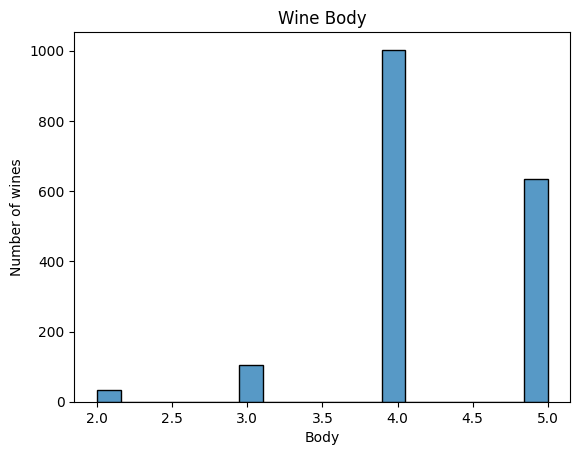

In [ ]:
# create a histogram of the body
sns.histplot(df_wine['body'])
plt.xlabel('Body')
plt.ylabel('Number of wines')
plt.title('Wine Body')
plt.show()

###Year

<Axes: xlabel='count', ylabel='year'>

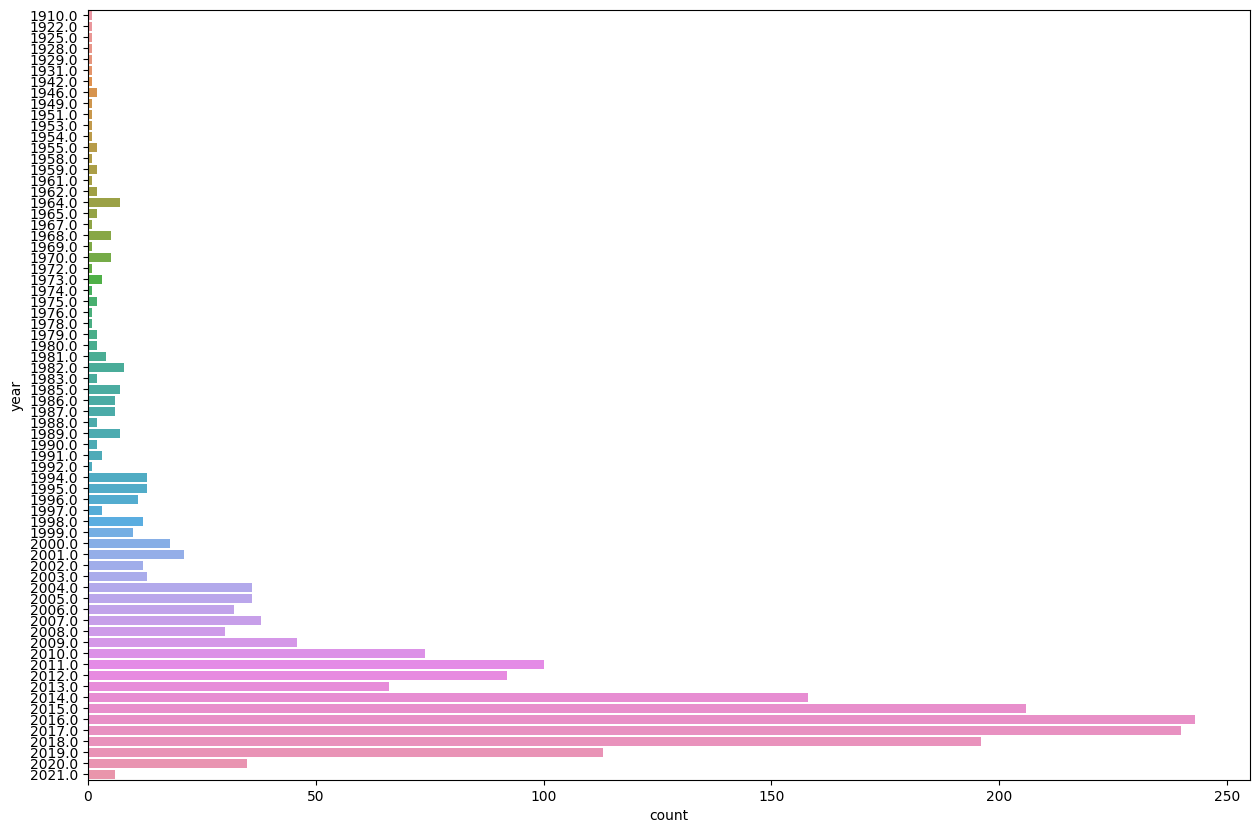

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=df_wine['year'])


*   Year: the minimum year is 1910 and the maximus is 2021.
*   The majority of wines are from year 2014 to 2019




<Axes: xlabel='year'>

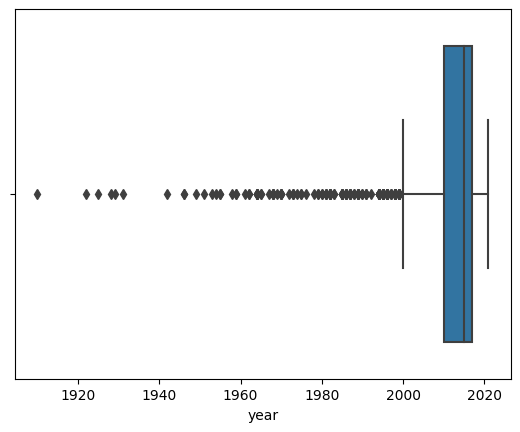

In [ ]:
sns.boxplot(x=df_wine['year'])



*   year: There are outliers



###Rating

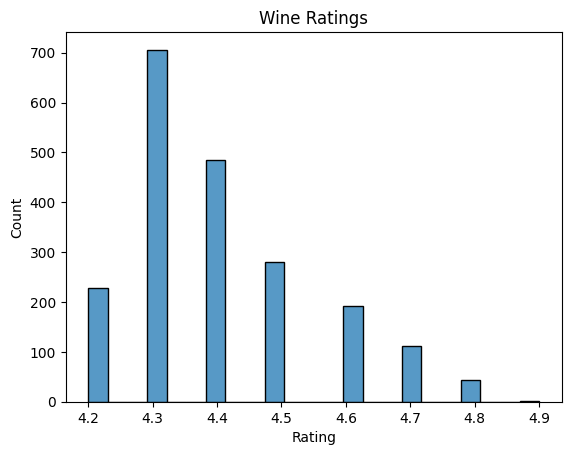

In [ ]:
# univariate visuals for rating
sns.histplot(df_wine['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Wine Ratings')
plt.show()


*   Ratings: The most ratings is 4.3



<Axes: xlabel='rating'>

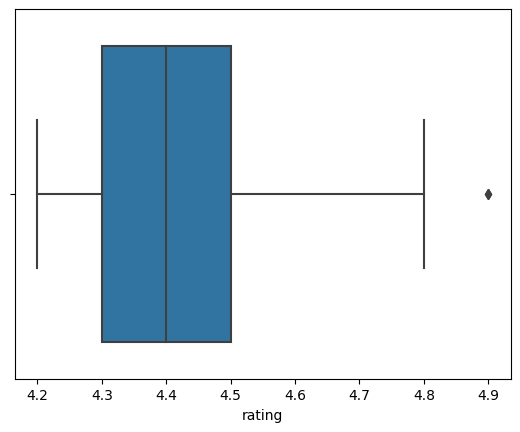

In [ ]:
sns.boxplot(x=df_wine['rating'])

rating: Few outliers found

###Number of Reviews

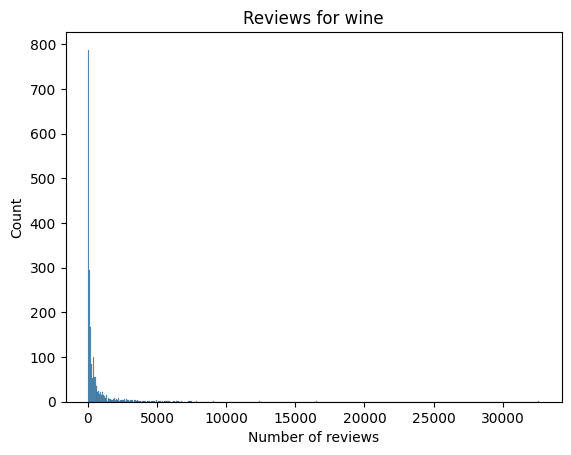

In [ ]:
# Create a histogram of the number of reviews
sns.histplot(df_wine['num_reviews'])
plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.title('Reviews for wine')
plt.show()


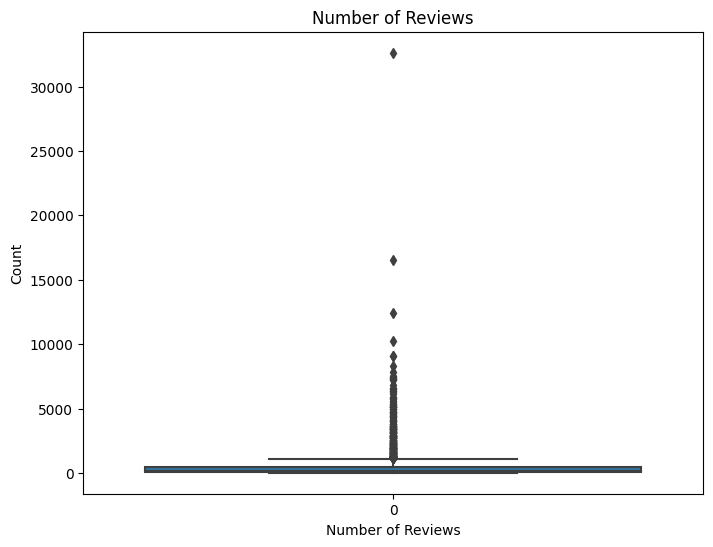

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_wine['num_reviews'])
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title('Number of Reviews')
plt.show()



*   num_review: there are few outliers



###Price

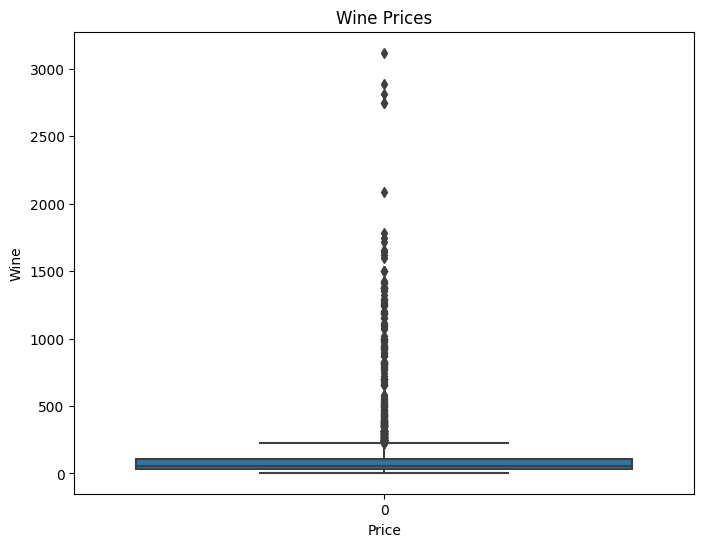

In [ ]:
# create a box plot of the price
plt.figure(figsize=(8, 6))
sns.boxplot(df_wine['price'])
plt.xlabel('Price')
plt.ylabel('Wine')
plt.title('Wine Prices')
plt.show()




*   Price: There are outliers found in this column



<Axes: xlabel='price', ylabel='Count'>

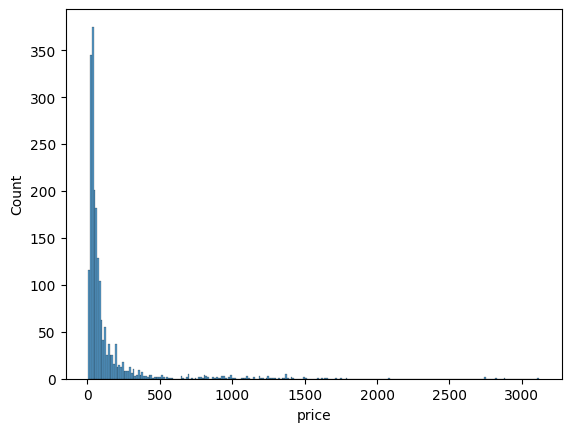

In [ ]:
# histplot visualization
sns.histplot(df_wine['price'])

###Acidity

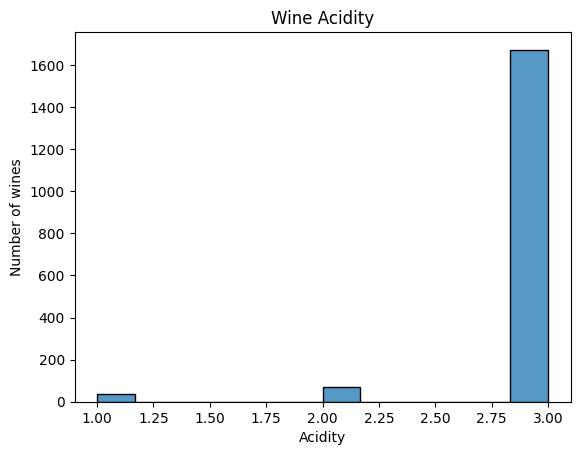

In [ ]:
# create a histgram of the acidity
sns.histplot(df_wine['acidity'])
plt.xlabel('Acidity')
plt.ylabel('Number of wines')
plt.title('Wine Acidity')
plt.show()

###**Categorical features**

In [ ]:
# show categorical columns
string_col = df_wine.select_dtypes('object').columns
string_col

Index(['winery', 'wine', 'country', 'region', 'type'], dtype='object')

In [ ]:
# showing the count of each unique value in the type column
df_wine['type'].value_counts()

Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64

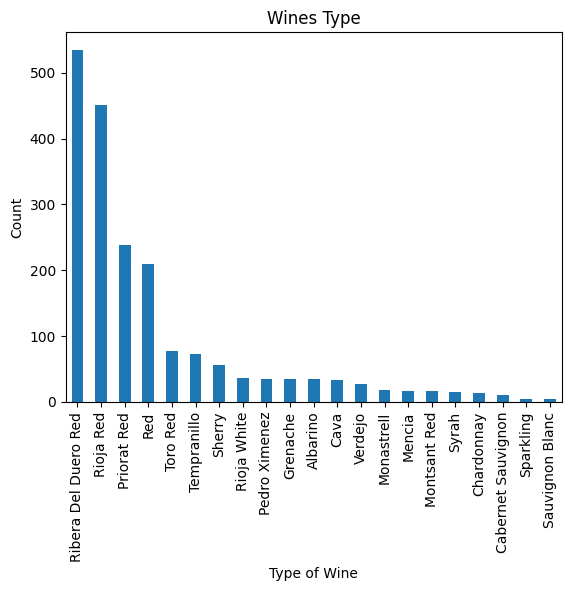

In [ ]:
# create a bar chart of the wine type
df_wine['type'].value_counts().plot(kind='bar')
plt.xlabel('Type of Wine')
plt.ylabel('Count')
plt.title('Wines Type')
plt.show()

*   There are more red wines than other wines.



###Region

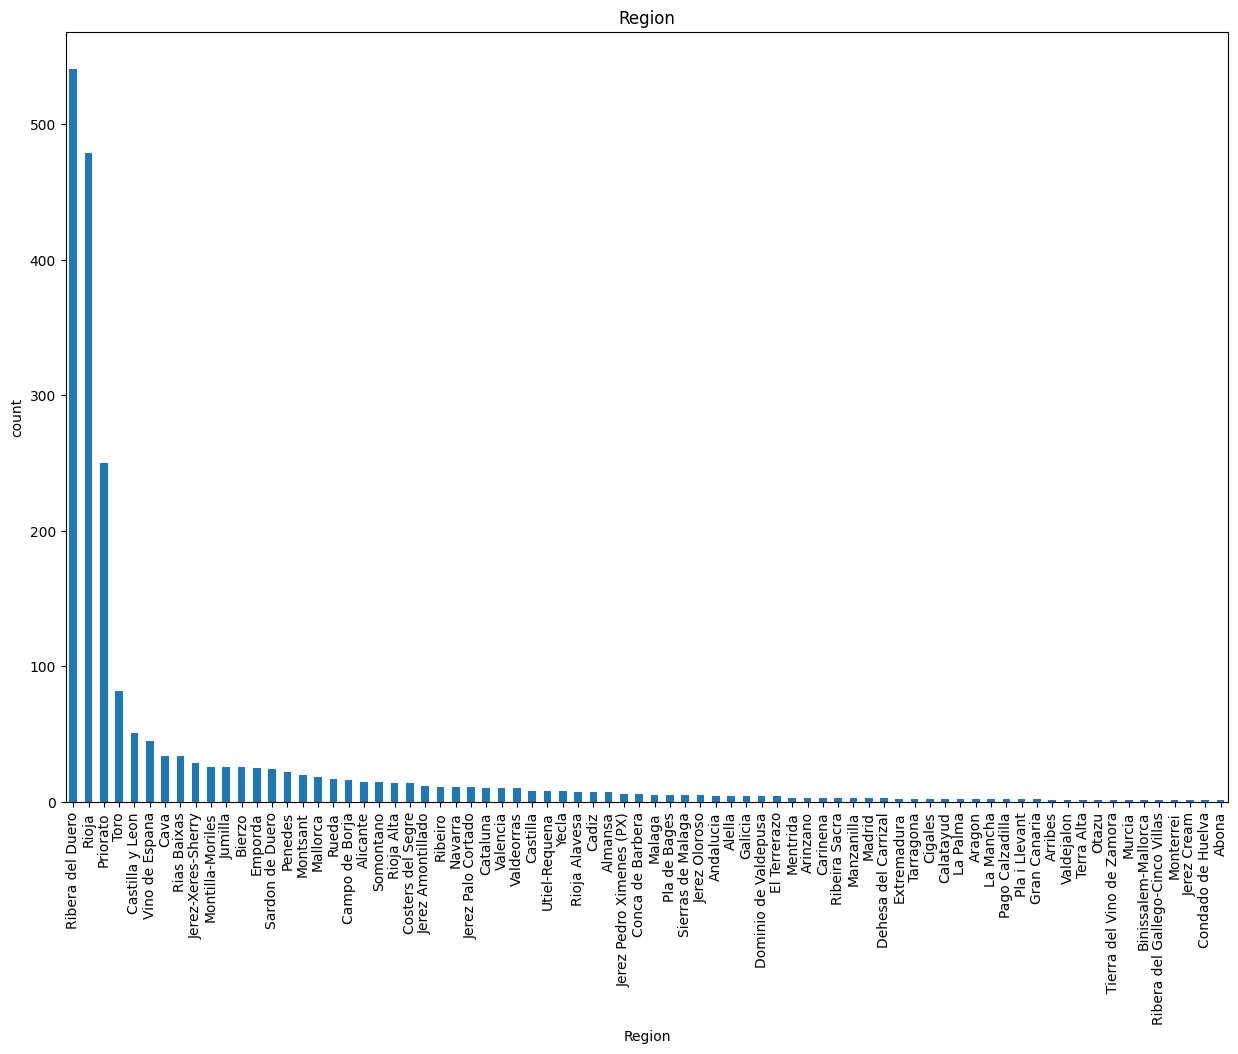

In [ ]:
# create a histgram of the region column
df_wine['region'].value_counts().plot(kind='bar', figsize=(15,10))
plt.xlabel('Region')
plt.ylabel('count')
plt.title('Region')
plt.show()

###Winery

In [ ]:
# calculating the number of unique values in winery column
df_wine['winery'].nunique()

480

Text(0.5, 1.0, 'Winery (Top 30)')

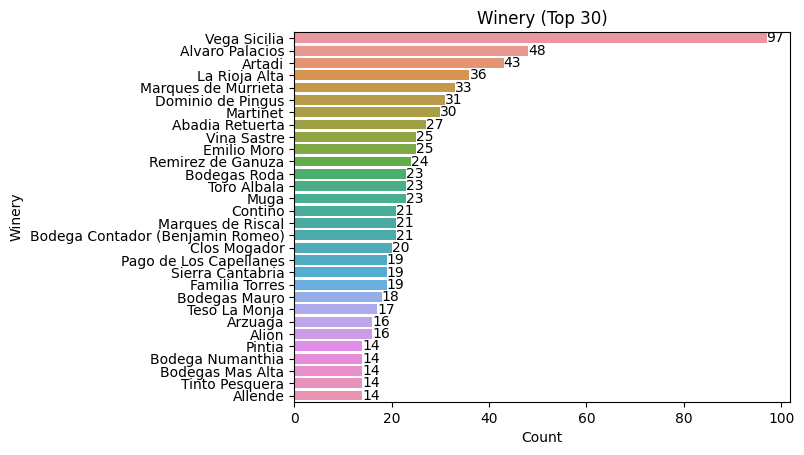

In [ ]:
ax = sns.countplot(data=df_wine, y='winery', order=df_wine['winery'].value_counts().iloc[:30].index)

ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.ylabel('Winery')
plt.title('Winery (Top 30)')

###Wine

In [ ]:
# calculating the number of unique values in wine column
df_wine['wine'].nunique()

847

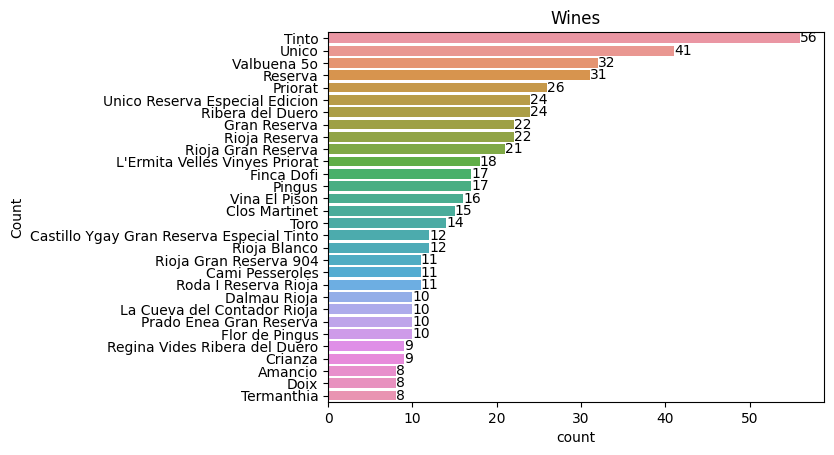

In [ ]:
# create a bar chart of the wine
ax = sns.countplot(data=df_wine, y='wine', order=df_wine['wine'].value_counts().iloc[:30].index)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Wines')
plt.show()

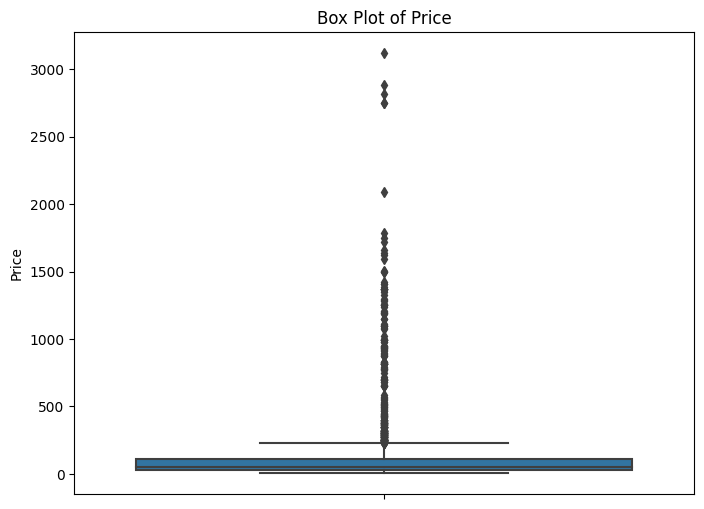

###**Identifying Outliers**